# **Q1.**

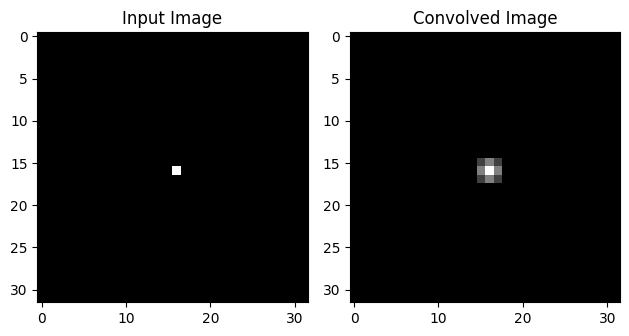

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Create the image with a unit impulse at (16,16)
image = np.zeros((32, 32))
image[16, 16] = 1

# Define the kernel
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]])

# Perform convolution
result = convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Input Image')

# Display the convolved image
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Convolved Image')

plt.tight_layout()
plt.show()


In above code, we first create the image with a unit impulse at location (16,16) by initializing a 32x32 array with zeros and setting the value at (16,16) to 1.

Next, we define the kernel as a 3x3 matrix. In this example, I've chosen a simple kernel for illustration purposes, where each element is set to a constant value. You can choose a different kernel based on your requirements.

Then, we use the convolve2d function from SciPy to perform the convolution. The mode='same' parameter ensures that the output has the same size as the input image. The boundary='fill' and fillvalue=0 parameters handle the border conditions during convolution.

Finally, we display the original image and the convolved image using matplotlib.

The purpose of this code is to visually confirm that the function is indeed performing convolution. By convolving the image with the kernel, we obtain the convolved image, where the impulse at (16,16) gets spread and influences the neighboring pixels based on the weights defined by the kernel. This demonstrates the fundamental operation of convolution.

# **Q2.**

To create a reconstruction of an input image from its Fourier transform, we can use different approaches: using only the magnitude response, using only the phase response, and using both magnitude and phase responses. These methods are described in the research paper titled "Signal synthesis and reconstruction from partial Fourier-domain information" by A. V. Oppenheim, J. S. Lim, and S. R. Curtis, published in the Journal of the Optical Society of America (JOSA) in 1983.

Here's an outline of the three methods:

**Reconstruction using only the magnitude response:**

Take the magnitude spectrum of the Fourier transform of the image while discarding the phase information.
Generate a random phase spectrum of the same size as the original image.
Combine the magnitude spectrum with the random phase spectrum to obtain the Fourier transform.
Perform an inverse Fourier transform to obtain the reconstructed image.


Text(0.5, 1.0, 'Original Image')

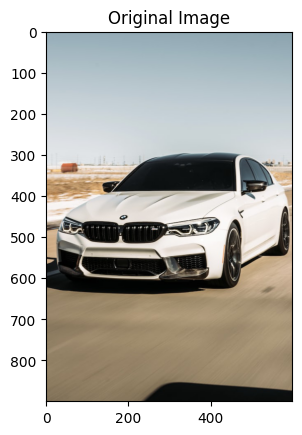

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2

# Load the input image
input_image = plt.imread('/content/car image.jpeg')
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')

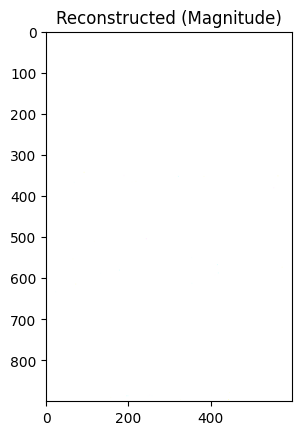

In [22]:

# Compute the Fourier transform of the input image
fourier_transform = fft2(input_image)

# Method 1: Reconstruction using only the magnitude response
# Calculate the magnitude spectrum of the Fourier transform
magnitude_spectrum = np.abs(fourier_transform)

# Generate a random phase spectrum of the same size as the Fourier transform
random_phase_spectrum = np.exp(1j * np.random.uniform(0, 2 * np.pi, size=fourier_transform.shape))

# Combine the magnitude spectrum with the random phase spectrum to obtain the Fourier transform
reconstructed_magnitude = magnitude_spectrum * random_phase_spectrum

# Perform an inverse Fourier transform to obtain the reconstructed image
reconstructed_image_magnitude = np.abs(ifft2(reconstructed_magnitude))

# Display the reconstructed image using only the magnitude response
plt.imshow(reconstructed_image_magnitude, cmap='gray')
plt.title('Reconstructed (Magnitude)')
plt.show()


Using only the magnitude spectrum will result in a reconstructed image that lacks important visual information

# **Reconstruction using only the phase response:**



Take the phase spectrum of the Fourier transform of the image while discarding the magnitude information.
Generate a constant magnitude spectrum of the same size as the original image (e.g., set all magnitudes to 1).
Combine the constant magnitude spectrum with the phase spectrum to obtain the Fourier transform.
Perform an inverse Fourier transform to obtain the reconstructed image.



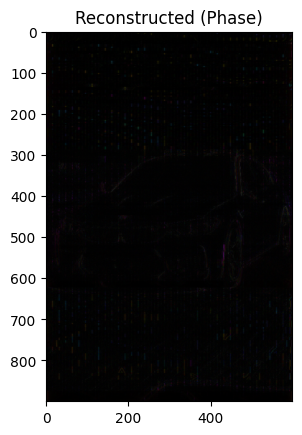

In [23]:
# Method 2: Reconstruction using only the phase response
# Calculate the phase spectrum of the Fourier transform
phase_spectrum = np.angle(fourier_transform)

# Create a constant magnitude spectrum with the same shape as the Fourier transform
constant_magnitude_spectrum = np.ones_like(fourier_transform)

# Combine the constant magnitude spectrum with the phase spectrum to obtain the Fourier transform
reconstructed_phase = constant_magnitude_spectrum * np.exp(1j * phase_spectrum)

# Perform an inverse Fourier transform to obtain the reconstructed image
reconstructed_image_phase = np.abs(ifft2(reconstructed_phase))

# Display the reconstructed image using only the phase response
plt.imshow(reconstructed_image_phase, cmap='gray')
plt.title('Reconstructed (Phase)')
plt.show()


# **Reconstruction using both magnitude and phase responses:**



Take both the magnitude and phase spectra of the Fourier transform of the image.
Generate a random phase spectrum of the same size as the original image.
Combine the original magnitude spectrum with the random phase spectrum to obtain the Fourier transform.
Perform an inverse Fourier transform to obtain the reconstructed image.

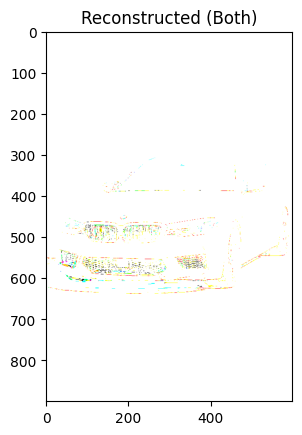

In [24]:
# Method 3: Reconstruction using both magnitude and phase responses
# Calculate the magnitude spectrum of the Fourier transform
magnitude_spectrum = np.abs(fourier_transform)

# Calculate the phase spectrum of the Fourier transform
phase_spectrum = np.angle(fourier_transform)

# Combine the magnitude and phase responses to obtain the Fourier transform
reconstructed_both = magnitude_spectrum * np.exp(1j * phase_spectrum)

# Perform an inverse Fourier transform to obtain the reconstructed image
reconstructed_image_both = np.abs(ifft2(reconstructed_both))

# Display the reconstructed image using both magnitude and phase responses
plt.imshow(reconstructed_image_both, cmap='gray')
plt.title('Reconstructed (Both)')
plt.show()


By combining both the magnitude and phase responses, this method aims to reconstruct the image with a better representation of the original spatial details and structure.